In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Only run once

os.chdir('..')

basepath = os.getcwd()

data_train = pd.read_csv(basepath + '/data/train.csv')
data_test = pd.read_csv(basepath + '/data/test.csv')

print(f"Training set shape: {data_train.shape}\n")
print(f"Test set shape: {data_test.shape}\n")

Training set shape: (7613, 5)

Test set shape: (3263, 4)



In [3]:
display(data_train.head())
data_train.info()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
data_train.keyword.value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [5]:
data_key = data_train[data_train.keyword.isna() == False]

In [6]:
data_key.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7552 entries, 31 to 7582
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7552 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7552 non-null   object
 4   target    7552 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 354.0+ KB


## Target variable - disaster tweets

In [7]:
data_key_yes = data_key.loc[data_key.target == 1]
data_key_yes

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1
38,56,ablaze,NaN,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...,1
46,66,ablaze,"GREENSBORO,NORTH CAROLINA",How the West was burned: Thousands of wildfire...,1
...,...,...,...,...,...
7542,10783,wreckage,"Xi'an, China",Wreckage 'conclusively confirmed' as from miss...,1
7543,10784,wreckage,Mumbai,Wreckage 'Conclusively Confirmed' as From MH37...,1
7552,10795,wrecked,"Santa Cruz, CA",Israel wrecked my home. Now it wants my land. ...,1
7559,10808,wrecked,NaN,300K exotic car wrecked in train accident \nht...,1


In [8]:
data_key_yes.keyword.value_counts()[:50]

derailment               39
wreckage                 39
outbreak                 39
debris                   37
oil%20spill              37
typhoon                  37
evacuated                32
suicide%20bombing        32
rescuers                 32
suicide%20bomb           32
nuclear%20disaster       31
razed                    31
suicide%20bomber         30
earthquake               30
airplane%20accident      30
collision                29
wildfire                 29
bridge%20collapse        29
evacuation               28
buildings%20on%20fire    28
mass%20murder            28
casualties               28
sandstorm                28
drought                  28
forest%20fires           27
devastation              27
hostages                 27
bombing                  27
wild%20fires             27
sinkhole                 27
famine                   26
thunderstorm             26
fatal                    26
displaced                26
derailed                 26
fatalities          

In [9]:
data_key_yes.location.value_counts()[:50]

USA                            67
United States                  27
Nigeria                        22
India                          20
Mumbai                         19
UK                             16
London                         16
New York                       16
Washington, DC                 15
Canada                         13
Worldwide                      12
Washington, D.C.                9
Chicago, IL                     9
Australia                       9
Indonesia                       8
Los Angeles, CA                 8
California, USA                 8
Earth                           8
California                      7
New York, NY                    7
Nashville, TN                   7
Toronto                         7
Los Angeles                     7
San Francisco, CA               7
Sacramento, CA                  7
San Francisco                   6
Denver, Colorado                6
New York City                   6
US                              6
Ireland       

## Target variable - Non-disaster tweets

In [10]:
data_key_no = data_key.loc[data_key.target == 0]
data_key_no

,id,keyword,location,text,target
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0
39,57,ablaze,Paranaque City,Ablaze for you Lord :D,0
...,...,...,...,...,...
7578,10830,wrecked,NaN,@jt_ruff23 @cameronhacker and I wrecked you both,0
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0


In [11]:
data_key_no.keyword.value_counts()[:50]

body%20bags    40
harm           37
armageddon     37
wrecked        36
ruin           36
deluge         36
explode        35
twister        35
fear           35
siren          35
aftershock     34
panic          34
screaming      34
blizzard       33
blazing        33
blaze          33
crush          33
sinking        33
traumatised    33
curfew         32
upheaval       32
bloody         32
body%20bag     32
hellfire       32
smoke          31
electrocute    31
blew%20up      31
collide        31
panicking      31
sunk           30
wreck          30
blight         30
screamed       30
stretcher      30
blood          30
bleeding       30
screams        30
desolation     29
demolish       29
quarantine     29
drown          29
inundated      29
lava           29
pandemonium    29
flattened      29
army           29
catastrophe    29
meltdown       28
destruction    28
destroy        28
Name: keyword, dtype: int64

In [12]:
data_key_no.location.value_counts()[:50]

New York                          55
USA                               37
London                            29
United States                     23
Los Angeles, CA                   18
Canada                            16
Kenya                             15
Everywhere                        12
Florida                           11
UK                                11
California                        10
NYC                               10
United Kingdom                    10
ss                                 9
London, England                    9
Australia                          9
Chicago, IL                        9
304                                9
San Francisco                      8
New York, NY                       8
Texas                              7
Pennsylvania, USA                  7
Manchester                         7
Chicago                            7
California, USA                    7
Seattle                            7
Worldwide                          7
W

## Text Cleaning

In [13]:
import nltk
import re
from unidecode import unidecode

In [14]:
regxcache={
# precompile regular expressions for faster preprocessing
"<.*?>" : re.compile("<.*?>"),
"&.{1,9};" : re.compile("&.{1,9};"),
"[^a-z]+" : re.compile("[^a-z]+"),
"\s[a-z]\s+" : re.compile("\s[a-z]\s+"),
"\s+" : re.compile("\s+"),
}

def preprocess(doc):
    """
    Normalize articles.

    1. lowercase
    2. only single whitespace
    3. unicode to ascii
    4. delete punctuation and numbers
    5. delete html tags <...>
    6. delete html character (like &nbsp;)
    7. delete stray single characters
    """
    # Lowercase
    doc = doc.lower()
    # expand negations
    doc = doc.replace("n't"," not")
    # Remove leading/trailing whitespace
    doc = doc.strip()
    # Convert Unicode into ASCII
    doc = unidecode(doc)
    # Remove HTML tags:
    doc = regxcache["<.*?>"].sub(" ", doc)
    # remove &nbsp; and other HTML codes up to 9 characters long
    doc = regxcache["&.{1,9};"].sub(" ", doc)
    # Remove punctuation and Numbers
    doc = regxcache["[^a-z]+"].sub( " ", doc)
    # Remove stray single characters
    doc = regxcache["\s[a-z]\s+"].sub( " ", doc)
    # Remove extra whitespace
    doc = regxcache["\s+"].sub( " ", doc)
    return doc

In [15]:
data_key["text_clean"] = data_key.text.apply(preprocess)

C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
# Text cleaning for whole dataset
data_train["text_clean"] = data_train["text"].apply(preprocess)

## Modelling

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV

from tensorflow import strings
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [18]:
X = data_train["text_clean"]
Y = data_train["target"].astype("bool")

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [43]:
vectorize_layer = keras.layers.TextVectorization(
    max_tokens = 5000,
    output_mode = 'tf-idf',
    idf_weights = True
)

vectorize_layer.adapt(X_train)

In [133]:
model = keras.Sequential([
    layers.Input(shape=(1,), dtype = 'string'),
    vectorize_layer,
    layers.Normalization(),
    layers.Dense(14, activation='relu', input_shape=[5000]),
    layers.Dense(14, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy']
)

In [134]:
early_stopping = keras.callbacks.EarlyStopping(
    patience = 1,
    min_delta = 0.001,
    restore_best_weights = True
)

history = model.fit(
    X_train, Y_train,
    validation_data = (X_test, Y_test),
    batch_size = 1024,
    epochs = 25,
    callbacks = [early_stopping]
)

Epoch 1/25
6/6 [==============================] - 2s 171ms/step - loss: 0.6950 - binary_accuracy: 0.5025 - val_loss: 0.6685 - val_binary_accuracy: 0.5929
Epoch 2/25
6/6 [==============================] - 0s 67ms/step - loss: 0.6364 - binary_accuracy: 0.7425 - val_loss: 0.6344 - val_binary_accuracy: 0.7190
Epoch 3/25
6/6 [==============================] - 0s 67ms/step - loss: 0.5859 - binary_accuracy: 0.8276 - val_loss: 0.5918 - val_binary_accuracy: 0.7656
Epoch 4/25
6/6 [==============================] - 0s 63ms/step - loss: 0.5270 - binary_accuracy: 0.8525 - val_loss: 0.5478 - val_binary_accuracy: 0.7774
Epoch 5/25
6/6 [==============================] - 0s 65ms/step - loss: 0.4659 - binary_accuracy: 0.8652 - val_loss: 0.5092 - val_binary_accuracy: 0.7886
Epoch 6/25
6/6 [==============================] - 0s 63ms/step - loss: 0.4094 - binary_accuracy: 0.8783 - val_loss: 0.4828 - val_binary_accuracy: 0.7965
Epoch 7/25
6/6 [==============================] - 0s 66ms/step - loss: 0.3615 - b

<AxesSubplot:>

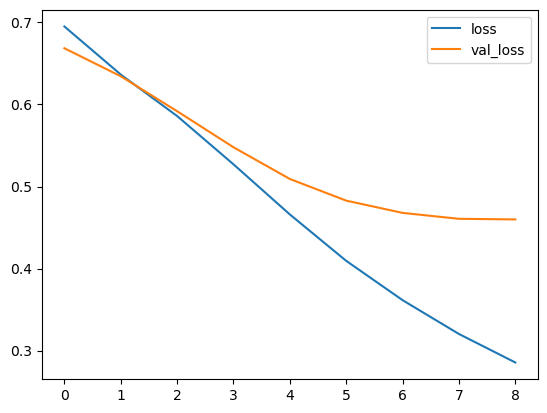

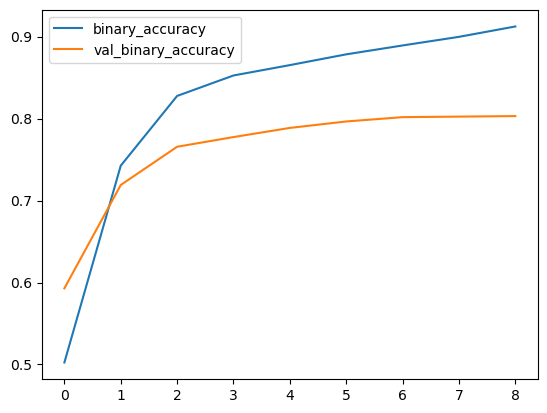

In [135]:
history_df = pd.DataFrame(history.history)

history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()

In [136]:
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

Best Validation Loss: 0.4599
Best Validation Accuracy: 0.8030


## Predicted Values

In [137]:
display(data_test.head())
data_test.info()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [138]:
X = data_test.text
X.head(15)

0                    Just happened a terrible car crash
1     Heard about #earthquake is different cities, s...
2     there is a forest fire at spot pond, geese are...
3              Apocalypse lighting. #Spokane #wildfires
4         Typhoon Soudelor kills 28 in China and Taiwan
5                    We're shaking...It's an earthquake
6     They'd probably still show more life than Arse...
7                                     Hey! How are you?
8                                      What a nice hat?
9                                             Fuck off!
10                                No I don't like cold!
11                           NOOOOOOOOO! Don't do that!
12                               No don't tell me that!
13                                            What if?!
14                                             Awesome!
Name: text, dtype: object

In [180]:
Y_pred = model.predict(X)

102/102 [==============================] - 1s 5ms/step


In [181]:
Y_pred = np.around(Y_pred, decimals = 0)

In [182]:
Y_pred = Y_pred.astype('int')

In [189]:
Y_pred = np.concatenate(Y_pred, axis = 0)

In [190]:
submission = pd.DataFrame({'id':data_test['id'].to_list(), 'target':Y_pred})
submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [191]:
submission.to_csv(basepath + '/data/sample_submission.csv', index = False)